# Greeks

## GBSM Method

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = 165
K = 165
T = 21/365
b = 0.0053
r = 0.0025
sigma = np.linspace(0.1,0.8,71)

In [3]:
def blackScholes(S, K, T, b, r, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (b + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*np.exp((b-r)*T)*norm.cdf(d1, 0, 1)-K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*np.exp((b-r)*T)*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

## Delta

In [4]:

def delta_calc(S, K, T, b, r, sigma, type="c"):
    "Calculate delta of call/put"
    d1 = (np.log(S/K) + (b + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")


## Gamma

In [5]:
def gamma_calc(S, K, T, b, r, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (b + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1) * np.exp((b-r)*T)/(S*sigma*np.sqrt(T))
        return gamma_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

## Vega

In [6]:
def vega_calc(S, K, T, b, r, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (b + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*np.exp((b-r)*T)*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

## Theta

In [7]:
def theta_calc(S, K, T, b, r, sigma, type="c"):
    "Calculate theta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*np.exp((b-r)*T)*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) \
                         - (b-r)*sigma*np.exp((b-r)*T)*norm.cdf(d1, 0, 1) \
                         - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) \
                         + (b-r)*sigma*np.exp((b-r)*T)*norm.cdf(-d1, 0, 1) \
                         + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

## Rho

In [8]:
def rho_calc(S, K, T, b, r, sigma, type="c"):
    "Calculate rho of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")
#%

def carry_rho_calc(S, K, T, b, r, sigma, type="c"):
    "Calculate rho of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = S*T*np.exp((b-r)*T)*norm.cdf(d1, 0, 1)
        elif type == "p":
            rho_calc = -S*T*np.exp((b-r)*T)*norm.cdf(-d1, 0, 1)
        return rho_calc*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [9]:
delta_call = delta_calc(S, K, T, b, r, sigma, "c")
delta_put = delta_calc(S, K, T, b, r, sigma, "p")
gamma = gamma_calc(S, K, T, b, r, sigma)
vega = vega_calc(S, K, T, b, r, sigma)
theta_call = theta_calc(S, K, T, b, r, sigma, "c")
theta_put = theta_calc(S, K, T, b, r, sigma, "p")
rho_call = rho_calc(S, K, T, b, r, sigma, "c")
rho_put = rho_calc(S, K, T, b, r, sigma, "p")
carry_rho_call = carry_rho_calc(S, K, T, b, r, sigma, "c")
carry_rho_put = carry_rho_calc(S, K, T, b, r, sigma, "p")

# Numeric Method
## Delta

In [10]:
def delta_diff(S, K, T, b, r, sigma, type="c", pricing_function = blackScholes):
    dS = .001
    if T == 0.0:
        if S == K:
            return {'c':0.5, 'p':0.5}[type]
        elif S > K:
            return {'c':1.0, 'p':0.0}[type]
        else:
            return {'c':0.0, 'p':-1.0}[type]
    else:
        return (pricing_function(S + dS, K, T, b, r, sigma, type) \
                     - pricing_function(S - dS, K, T, b, r, sigma, type)) / (2 * dS)

## Gamma

In [11]:
def gamma_diff(S, K, T, b, r, sigma, type="c", pricing_function = blackScholes):
    dS = 0.001
    if T == 0:
        return float("inf") if S == K else 0.0

    return (pricing_function(S + dS, K, T, b, r, sigma, type) - 2. * \
            pricing_function(S, K, T, b, r, sigma, type) + \
            pricing_function(S - dS, K, T, b, r, sigma, type)) / dS ** 2

## Vega

In [12]:
def vega_diff(S, K, T, b, r, sigma, type="c", pricing_function = blackScholes):

    return (pricing_function(S, K, T, b, r, sigma + 0.0001, type) - \
            pricing_function(S, K, T, b, r, sigma - 0.0001, type) )/ 0.0002

## Theta

In [13]:
def theta_diff(S, K, T, b, r, sigma, type="c", pricing_function = blackScholes):

    if T <= 1. / 365:
        return pricing_function(S, K, 0.00001, b, r, sigma, type) - \
               pricing_function(S, K, T, b, r, sigma, type)
    else:
        return pricing_function(S, K, T - 1./365, b, r, sigma, type) - \
               pricing_function(S, K, T, b, r, sigma, type)

## Rho

In [14]:
def rho_diff(S, K, T, b, r, sigma, type="c", pricing_function = blackScholes):
    return (pricing_function(S, K, T, b , r + 0.0001, sigma, type) - \
            pricing_function(S, K, T, b , r - 0.0001, sigma, type)) / 0.02

In [15]:
def carry_rho_diff(S, K, T, b, r, sigma, type="c", pricing_function = blackScholes):

    return (pricing_function(S, K, T, b + 0.0001, r, sigma, type) - \
            pricing_function(S, K, T, b - 0.0001, r, sigma, type)) / 0.02

In [16]:
delta_call_num = delta_diff(S, K, T, b, r, sigma, "c")
delta_put_num = delta_diff(S, K, T, b, r, sigma, "p")
gamma_num = gamma_diff(S, K, T, b, r, sigma)
vega_num = vega_diff(S, K, T, b, r, sigma, "c")
theta_call_num = theta_diff(S, K, T, b, r, sigma, "c")
theta_put_num = theta_diff(S, K, T, b, r, sigma, "p")
rho_call_num = rho_diff(S, K, T, b, r, sigma, "c")
rho_put_num = rho_diff(S, K, T, b, r, sigma, "p")
carry_rho_call_num = carry_rho_diff(S, K, T, b, r, sigma, "c")
carry_rho_put_num = carry_rho_diff(S, K, T, b, r, sigma, "p")

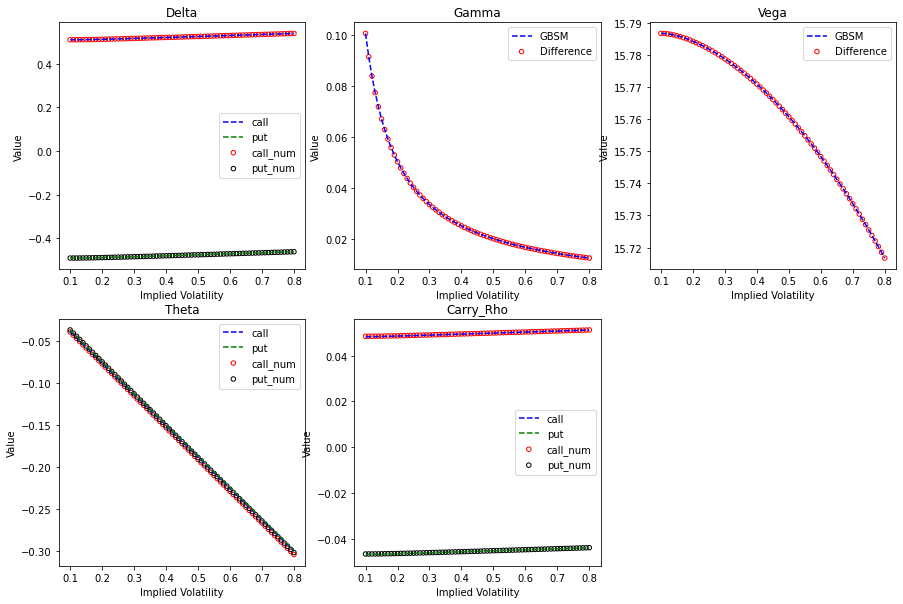

In [17]:
plt.figure(figsize =(15,10))
plt.subplot(2,3,1)
plt.plot(sigma, delta_call,'b--')
plt.scatter(sigma, delta_call_num, s=20, facecolors = 'none', edgecolors = 'r')
plt.plot(sigma, delta_put,'g--')
plt.scatter(sigma, delta_put_num, s=20, facecolors = 'none', edgecolors = 'black')
plt.title('Delta')
plt.xlabel('Implied Volatility')
plt.ylabel('Value')
plt.legend(['call','put','call_num','put_num'])
plt.subplot(2,3,2)
plt.plot(sigma, gamma,'b--')
plt.scatter(sigma, gamma_num, s=20, facecolors = 'none', edgecolors = 'r')
plt.title('Gamma')
plt.xlabel('Implied Volatility')
plt.ylabel('Value')
plt.legend(['GBSM', 'Difference'])
plt.subplot(2,3,3)
plt.plot(sigma, vega,'b--')
plt.scatter(sigma, vega_num, s=20, facecolors = 'none', edgecolors = 'r')
plt.title('Vega')
plt.xlabel('Implied Volatility')
plt.ylabel('Value')
plt.legend(['GBSM', 'Difference'])
plt.subplot(2,3,4)
plt.plot(sigma, theta_call,'b--')
plt.scatter(sigma, theta_call_num, s=20, facecolors = 'none', edgecolors = 'r')
plt.plot(sigma, theta_put,'g--')
plt.scatter(sigma, theta_put_num, s=20, facecolors = 'none', edgecolors = 'black')
plt.title('Theta')
plt.xlabel('Implied Volatility')
plt.ylabel('Value')
plt.legend(['call','put','call_num','put_num'])
plt.subplot(2,3,5)
plt.plot(sigma, carry_rho_call,'b--')
plt.scatter(sigma, carry_rho_call_num, s=20, facecolors = 'none', edgecolors = 'r')
plt.plot(sigma, carry_rho_put,'g--')
plt.scatter(sigma, carry_rho_put_num, s=20, facecolors = 'none', edgecolors = 'black')
plt.title('Carry_Rho')
plt.xlabel('Implied Volatility')
plt.ylabel('Value')
plt.legend(['call','put','call_num','put_num'])

# Binomial Tree Valuation for American Option

In [18]:
def american_tree(S0, K, T, r, b, N, sigma, opttype='p'):
    #precompute values
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    q = (np.exp(b*dt) - d)/(u-d)
    disc = np.exp(-r*dt)

    # initialise stock prices at maturity
    S = S0 * d**(np.arange(N,-1,-1)) * u**(np.arange(0,N+1,1))

    # option payoff
    if opttype == 'p':
        C = np.maximum(0, K - S)
    else:
        C = np.maximum(0, S - K)

    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        S = S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        C[:i+1] = disc * ( q*C[1:i+2] + (1-q)*C[0:i+1] )
        C = C[:-1]
        if opttype == 'p':
            C = np.maximum(C, K - S)
        else:
            C = np.maximum(C, S - K)

    return C[0]

In [19]:
def american_tree_div(S0,K,T,r,b,N,sigma,divAmts,divTimes, opttype='c'):
    if len(divAmts) == 0 or len(divTimes) == 0:
        return american_tree(S0, K, T, r, b, N, sigma, 'c')
    elif divTimes[0] > N:
        return american_tree(S0, K, T, r, b, N, sigma, 'c')

    #precompute values
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    q = (np.exp(b*dt) - d)/(u-d)
    disc = np.exp(-r*dt)
    if opttype == 'c':
        z = 1.0
    elif opttype == 'p':
        z = -1.0

    nNodeFunc = lambda n: int((n+1)*(n+2)/2)
    idxFunc = lambda i, j: nNodeFunc(j-1)+i+1
    nDiv = divTimes.size
    nNodes = nNodeFunc(int(divTimes[0]))

    optionValues = np.zeros(nNodes)

    for j in np.arange(divTimes[0],-1,-1):
        for i in np.arange(j,-1,-1):
            idx = idxFunc(i,j)
            price = S0 * u ** i * d ** (j-1)
            payoff = z * (price - K)

            if j < divTimes[0]:
                ## !!! np.max([a,b]) np.maximum(a,b)
                optionValues[idx-1] = np.maximum(0, payoff)
                optionValues[idx-1] = np.maximum(optionValues[idx-1],disc*(q*optionValues[idxFunc(i+1,j+1)-1] + \
                                                                    (1-q)*optionValues[idxFunc(i,j+1)-1]))
            else:
                #american_tree_div(S0,K,T,r,b,N,sigma,divAmts,divTimes, opttype='c')
                valNoEx = american_tree_div(price-divAmts[0], K, T-divTimes[0]*dt, r, b, N - divTimes[0],sigma,
                                            divAmts[1:nDiv-1],divTimes[1:nDiv-1] - divTimes[0],'c')
                valEx = np.maximum(0, payoff)
                optionValues[idx-1] = np.maximum(valNoEx, valEx)

    return optionValues[0]

In [20]:
Amts = np.array([1.0,1.0])
Times = np.array([1,2])
#american_tree_div(S0,K,T,r,b,N,sigma,divAmts,divTimes, opttype='c')
american_tree_div(100,100,.5,.08,.08,100,.3,Amts,Times,"c")

10.392236209067239

In [27]:
Amts = np.array([0.88])
Times = np.array([17])
value_call = american_tree_div(S,K,T,r,r,21,.2,Amts,Times,"c")
value_put = american_tree_div(S,K,T,r,r,21,.2,Amts,Times,"p")
print("call option:" + str(value_call))
print("put option:" + str(value_put))

call option:1.7363716720175546
put option:12.484567965981746


In [28]:
Sensitivity_call = (american_tree_div(S,K,T,r,r,21,.2,np.array([0.89]),Times,"c") - \
                   american_tree_div(S,K,T,r,r,21,.2,np.array([0.87]),Times,"c"))/0.02
Sensitivity_put = (american_tree_div(S,K,T,r,r,21,.2,np.array([0.89]),Times,"p") - \
                   american_tree_div(S,K,T,r,r,21,.2,np.array([0.87]),Times,"p"))/0.02